In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [16]:
df = pd.read_csv('data.csv')

In [17]:
print("Data shape:", df.shape)

Data shape: (569, 33)


In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
#Пропущенные значения
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [20]:
df = df.drop(columns=['Unnamed: 32'])

In [21]:
# Функция для установки кодировщика меток
def label_encoder_fit(x):
    unique_values = np.unique(x)
    labels = {value: i for i, value in enumerate(unique_values)}
    return labels

In [22]:
# Функция преобразования этикеток с помощью встроенного энкодера
def label_encoder_transform(x, labels):
    return [labels[value] for value in x]

In [23]:
# Применить кодировку меток к столбцам объекта
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        labels = label_encoder_fit(df[column])
        label_encoders[column] = labels
        df[column] = label_encoder_transform(df[column], labels)

label_encoders

{'diagnosis': {'B': 0, 'M': 1}}

In [24]:
# Функция масштабирования функций
def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

In [25]:
# Разделить данные на тренировочный и тестовый наборы
def train_test_split(df, test_ratio):
    num_rows = df.shape[0]
    num_test_rows = int(num_rows * test_ratio)
    test_indices = random.sample(range(num_rows), num_test_rows)
    test_set = df.iloc[test_indices]
    train_set = df.drop(test_indices)
    return train_set, test_set

In [26]:
train, test = train_test_split(df, 0.3)

In [27]:
# Отдельные функции и метки для тренировочного набора
X_train = train.drop(columns=['diagnosis']).values
Y_train = train["diagnosis"].values

# Отдельные функции и метки для тестового набора
X_test = test.drop(columns=['diagnosis']).values
Y_test = test["diagnosis"].values

# Масштабировать функции
X_train = feature_scaling(X_train)
X_test = feature_scaling(X_test)

In [28]:
# Функции логистической регрессии
def predict(X,W,b):
    return W.dot(X)+b

In [29]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [30]:
def cost(W,b):
    m,n = X_train.shape
    cost = 0
    for i in range(m):
        fx = sigmoid(predict(X_train[i], W, b))
        cost += Y_train[i]*np.log(fx)+(1-Y_train[i])*np.log(1-fx)
    cost = -cost/m
    return cost

In [31]:
def gradient_step(W, b):
    m,n = X_train.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        fx = sigmoid(predict(X_train[i], W, b))
        for j in range(n):
            dj_dw[j] += (fx - Y_train[i]) * X_train[i][j]
        dj_db += fx - Y_train[i]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return [dj_dw, dj_db]

In [32]:
def gradient_decent(alpha, iterations, init_W, init_b, record_interval):
    local_W = init_W
    local_b = init_b
    cost_history = [cost(local_W, local_b)]
    for i in range(iterations):
        new_W, new_b = gradient_step(local_W, local_b)
        local_W = local_W - (alpha*new_W)
        local_b = local_b - (alpha*new_b)
        if i%record_interval==0:
            local_cost = cost(local_W, local_b)
            print(f"Iteration {i}: Cost = {local_cost}")
            cost_history.append(local_cost)
    return [local_W, local_b, cost_history]

In [33]:
m, n = X_train.shape
W = np.zeros((n,))
b = 0
alpha = 0.001  # Скорость обучения
iterations = 20000 # Количество итераций
variable_frequency = 1000 # Частота записи стоимости

W, b, cost_history = gradient_decent(alpha, iterations, W, b,variable_frequency)

print('Final weights:')
print(W)
print('Final bias:')
print(b)

Iteration 0: Cost = 0.6912199455789227
Iteration 1000: Cost = 0.25158417973234215
Iteration 2000: Cost = 0.18441301003789215
Iteration 3000: Cost = 0.15382714659159463
Iteration 4000: Cost = 0.13574934721902848
Iteration 5000: Cost = 0.123603541655705
Iteration 6000: Cost = 0.1147807001653005
Iteration 7000: Cost = 0.10802493558492206
Iteration 8000: Cost = 0.10265185678073825
Iteration 9000: Cost = 0.09825433530547396
Iteration 10000: Cost = 0.09457380223266125
Iteration 11000: Cost = 0.09143749407373843
Iteration 12000: Cost = 0.08872521034342382
Iteration 13000: Cost = 0.08635051159685765
Iteration 14000: Cost = 0.08424950440427868
Iteration 15000: Cost = 0.08237385083794574
Iteration 16000: Cost = 0.08068624675878991
Iteration 17000: Cost = 0.07915740309171303
Iteration 18000: Cost = 0.07776397474838098
Iteration 19000: Cost = 0.07648710547866666
Final weights:
[ 0.0467497   0.50077705  0.41877997  0.49705954  0.48903294  0.16994067
  0.19065183  0.38032084  0.51152889  0.16490307 

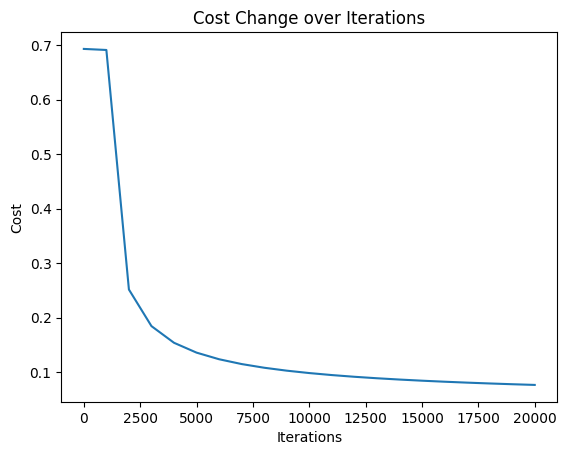

In [34]:
# График изменения стоимости за итерации
plt.plot(range(0, iterations + 1, variable_frequency), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Change over Iterations')
plt.show()

In [35]:
# Делаем прогнозы на тестовом наборе
linear_combination = np.dot(X_test, W) + b
probabilities = sigmoid(linear_combination)
predictions = np.where(probabilities >= 0.4, 1, 0)
accuracy = np.mean(predictions == Y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 98.23529411764706 %
